In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117


In [2]:
!git clone https://github.com/ultralytics/yolov5
    

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5


In [4]:
!pip install -r requirements.txt 

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [5]:
!cd yolov5 & pip install -r requirements.txt 

In [6]:
!pip show torch

Name: torch
Version: 2.0.1+cu117
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: c:\users\dell\anaconda3\lib\site-packages
Requires: filelock, jinja2, networkx, sympy, typing-extensions
Required-by: thop, torchaudio, torchvision, ultralytics


In [1]:
import torch 
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model

Using cache found in C:\Users\Dell/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-10-2 Python-3.10.9 torch-2.0.1+cu117 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [3]:
img = "https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/bus.jpg"
result = model(img)
result.print()

image 1/1: 1080x810 4 persons, 1 bus
Speed: 459.5ms pre-process, 877.3ms inference, 7.6ms NMS per image at shape (1, 3, 640, 480)


In [4]:
plt.imshow(np.squeeze(result.render()))

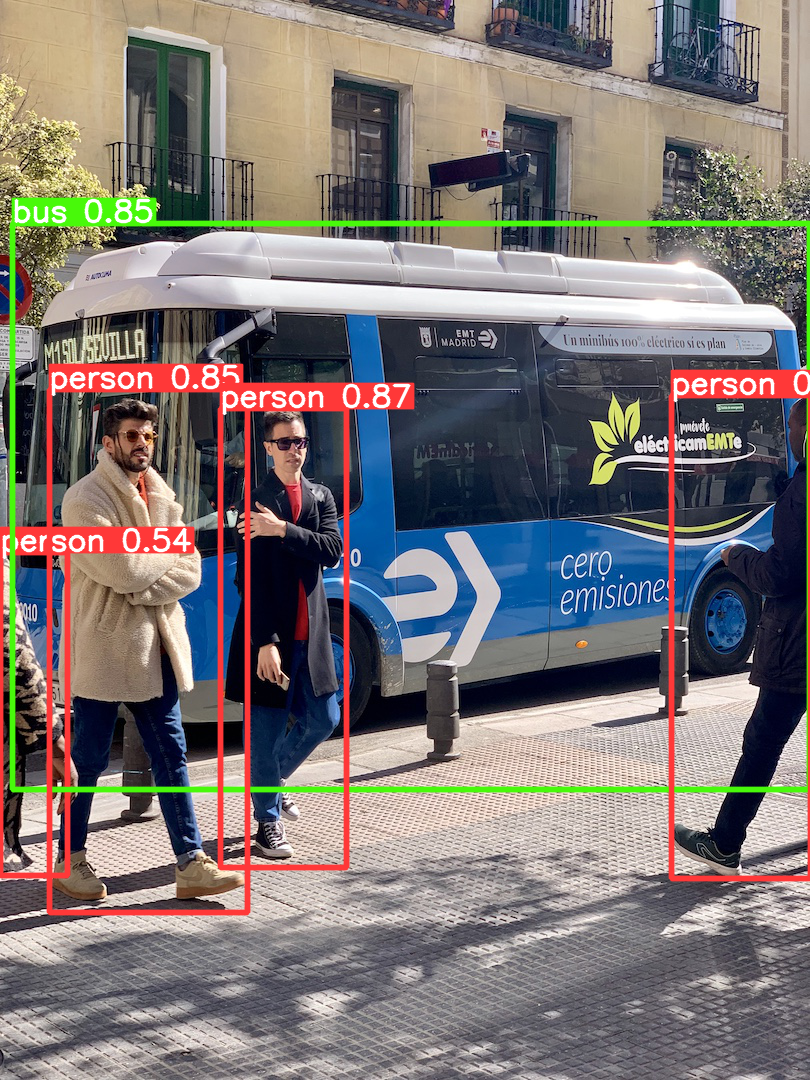

In [5]:
result.show()

In [6]:
result.render()

[array([[[172, 148, 122],
         [170, 146, 120],
         [177, 153, 125],
         ...,
         [184, 170, 157],
         [185, 171, 158],
         [185, 171, 158]],
 
        [[177, 153, 127],
         [174, 150, 124],
         [179, 155, 127],
         ...,
         [185, 171, 158],
         [186, 172, 159],
         [186, 172, 159]],
 
        [[178, 154, 128],
         [176, 152, 126],
         [178, 154, 126],
         ...,
         [185, 171, 158],
         [185, 171, 158],
         [185, 171, 158]],
 
        ...,
 
        [[191, 185, 185],
         [188, 182, 182],
         [185, 179, 179],
         ...,
         [112, 107, 114],
         [111, 105, 115],
         [112, 106, 116]],
 
        [[163, 157, 157],
         [186, 180, 180],
         [191, 185, 185],
         ...,
         [103,  97, 107],
         [ 98,  92, 102],
         [104,  98, 108]],
 
        [[118, 112, 112],
         [166, 160, 160],
         [174, 170, 169],
         ...,
         [ 95,  89,  99],
  

In [22]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Train from scratch

In [23]:
import uuid   # Unique identifier
import os
import time

In [31]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [33]:
cap = cv2.VideoCapture(0)
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [34]:
!git clone https://github.com/HumanSignal/labelImg

Cloning into 'labelImg'...


In [37]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [38]:
!pip install PyQt5
!pip install pyqt5-tools


     -------------------------------------- 66.8/66.8 kB 897.8 kB/s eta 0:00:00
     -------------------------------------- 64.5/64.5 MB 547.4 kB/s eta 0:00:00


In [12]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500  --data dataset.yml --weights yolov5s.pt --workers 2

# Load Custom Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt')

In [ ]:
img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')


In [ ]:
results = model(img)

In [ ]:
results.print()

In [ ]:
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

 Some problem in traning phase it requires more image